# Config


In [ ]:
import pandas as pd
import geopandas as gpd
from datetime import datetime
from vehicles import load_positions_renfe

from config import EXTERNAL_DATA_DIR, PROCESSED_DATA_DIR


In [2]:
#Url Dinamic Data
VEHICLES_URL = "https://gtfsrt.renfe.com/vehicle_positions.pb"

#Location static data
FOLDER = "RT_BIZKAIA_gpkg"
gpkg_path = EXTERNAL_DATA_DIR / FOLDER / "rt_ffcc.gpkg"


# Load data

## Get vehicles

In [3]:
df_renfe = load_positions_renfe(VEHICLES_URL)
df_renfe

,vehicle_id,lat,lon,timestamp,mode
0,32718,43.086685,-2.319845,2025-12-02 16:13:48,renfe
1,32721,43.050964,-2.330527,2025-12-02 16:13:48,renfe


## Get stations

<Axes: >

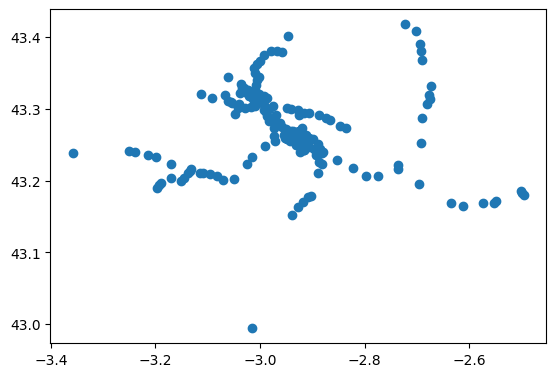

In [4]:
stops = gpd.read_file(gpkg_path, layer="rt_estacionffcc_p")
stops.head(2)
stops.plot()

## Get lines

<Axes: >

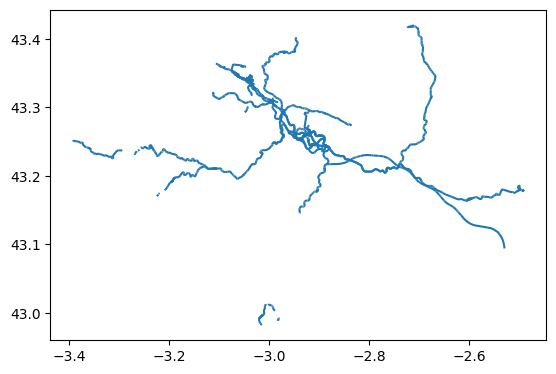

In [5]:
# List all layer names in the GeoPackage
lines = gpd.read_file(gpkg_path, layer="rt_tramofc_linea")
lines.head(2)
lines.plot()


# Data management (Code)

## Clean Stations & Stops

In [6]:
stops.describe()

,id_estfc,tipo_estfc,tipo_uso,estadofis,situacion
count,1.750000e+02,175.000000,175.000000,175.000000,175.000000
mean,4.810607e+11,11.091429,-55.445714,1.045714,1.228571
std,2.286088e+09,11.136699,232.560303,0.299754,0.434551
min,4.800100e+11,1.000000,-998.000000,1.000000,1.000000
25%,4.802000e+11,3.000000,1.000000,1.000000,1.000000
50%,4.803400e+11,5.000000,1.000000,1.000000,1.000000
75%,4.808200e+11,20.000000,3.000000,1.000000,1.000000
max,4.891200e+11,30.000000,3.000000,3.000000,3.000000


## Clean Lines

In [7]:
lines_clean = lines.copy()
lines_clean=lines_clean[lines_clean["tipo_tramd"]=="Troncal"]
lines_clean=lines_clean[lines_clean["estadofisd"]=="En servicio"]
lines_clean=lines_clean[lines_clean["tipo_lined"]=="Tren"]

print(lines_clean.shape)
print(lines_clean.columns)

lines_clean.head()
# lines["tipo_lined"].value_counts()


(992, 29)
Index(['id_tramo', 'codigo', 'tipo_tramo', 'tipo_tramd', 'ancho_via',
       'ancho_viad', 'electrific', 'electrifid', 'estadofis', 'estadofisd',
       'n_vias', 'situacion', 'situaciond', 'red_tent', 'red_tentd',
       'uso_ppal', 'uso_ppald', 'titular', 'titulard', 'fuente', 'fuented',
       'id_lineafc', 'nombre', 'tipo_linea', 'tipo_lined', 'fuente_l',
       'fuente_ld', 'alta_db', 'geometry'],
      dtype='object')


,id_tramo,codigo,tipo_tramo,tipo_tramd,ancho_via,ancho_viad,electrific,electrifid,estadofis,estadofisd,...,fuente,fuented,id_lineafc,nombre,tipo_linea,tipo_lined,fuente_l,fuente_ld,alta_db,geometry
0,480000000002,17000160,1,Troncal,1,Ibérico,1,Sí,1,En servicio,...,27,ADIF,17000000001,700 - INT. ABANDO IND. PRIETO-CASETAS,1,Tren,27,ADIF,2025-04-02,"LINESTRING Z (-2.90322 43.18092 78.33465, -2.9..."
1,480000000012,17000160,1,Troncal,1,Ibérico,1,Sí,1,En servicio,...,27,ADIF,17000000001,700 - INT. ABANDO IND. PRIETO-CASETAS,1,Tren,27,ADIF,2025-04-02,"LINESTRING Z (-2.93926 43.14567 115.83387, -2...."
2,480000000015,17000140,1,Troncal,1,Ibérico,1,Sí,1,En servicio,...,27,ADIF,17000000001,700 - INT. ABANDO IND. PRIETO-CASETAS,1,Tren,27,ADIF,2025-04-02,"LINESTRING Z (-3.00798 43.01037 273.7698, -3.0..."
3,480000000016,17000160,1,Troncal,1,Ibérico,1,Sí,1,En servicio,...,27,ADIF,17000000001,700 - INT. ABANDO IND. PRIETO-CASETAS,1,Tren,27,ADIF,2025-04-02,"LINESTRING Z (-2.93912 43.14581 116.2609, -2.9..."
4,480000000043,17000170,1,Troncal,1,Ibérico,1,Sí,1,En servicio,...,27,ADIF,17000000001,700 - INT. ABANDO IND. PRIETO-CASETAS,1,Tren,27,ADIF,2025-04-02,"LINESTRING Z (-2.90658 43.24444 47.0653, -2.90..."


In [9]:
lines_clean.to_csv(PROCESSED_DATA_DIR / "renfe_lines.csv", index=False)

# Plots

In [ ]:
# Plots and visualizations

# Save results

In [14]:
#Save results and figures
FOLDER = "renfe"
(PROCESSED_DATA_DIR / FOLDER).mkdir(parents=True, exist_ok=True)
lines_clean.to_file(PROCESSED_DATA_DIR / FOLDER / "renfe_lines.gpkg", layer="lines")
stops.to_file(PROCESSED_DATA_DIR / FOLDER / "renfe_stops.gpkg", layer="stops")

lines_clean.to_file(PROCESSED_DATA_DIR / FOLDER / "renfe_lines.geojson")
